In [3]:
#load dataset and view
import pandas as pd

# Install the tabulate library
!pip install tabulate

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Read the CSV file into a DataFrame
df_fuel = pd.read_csv('/content/drive/MyDrive/quickview of price surge in nigeria/Monthly/avg_fuel_pr.csv')

# Display the first 5 rows
print(df_fuel.head().to_markdown(index=False, numalign="left", stralign="left"))

# Print the column names and their data types
print(df_fuel.info())

| Month_Year   | Price in Naira Per Litre   |
|:-------------|:---------------------------|
| 01/01/1985   | 0.2                        |
| 01/02/1985   | 0.2                        |
| 01/03/1985   | 0.2                        |
| 01/04/1985   | 0.2                        |
| 01/05/1985   | 0.2                        |
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 472 entries, 0 to 471
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Month_Year                472 non-null    object 
 1   Price in Naira Per Litre  472 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.5+ KB
None


In [2]:
#  df_fuel head and shape

print(df_fuel.head())
print(df_fuel.shape)


   Month_Year  Price in Naira Per Litre
0  01/01/1985                       0.2
1  01/02/1985                       0.2
2  01/03/1985                       0.2
3  01/04/1985                       0.2
4  01/05/1985                       0.2
(472, 2)


In [19]:
#  describe

# Describe the data in the DataFrame
df_fuel.describe()


,Month_Year,Price in Naira Per Litre,Month_Year_Timestamp
count,472,472.000000,4.720000e+02
mean,2004-03-08 18:06:06.101694976,69.102521,1.078769e+09
min,1985-01-01 00:00:00,0.200000,4.733856e+08
25%,1994-01-10 18:00:00,11.000000,7.582248e+08
50%,2004-01-08 12:00:00,40.000000,1.073563e+09
75%,2014-01-06 06:00:00,97.000000,1.388988e+09
max,2024-01-04 00:00:00,701.240000,1.704326e+09
std,NaN,107.184750,3.587357e+08


In [21]:
#  calculate maximun and minimum and average prices

# Calculate the maximum price
max_price = df_fuel['Price in Naira Per Litre'].max()

# Calculate the minimum price
min_price = df_fuel['Price in Naira Per Litre'].min()

# Calculate the average price
average_price = df_fuel['Price in Naira Per Litre'].mean()

# Print the results
print("Maximum price:", max_price)
print("Minimum price:", min_price)
print("Average price:", average_price)


Maximum price: 701.24
Minimum price: 0.2
Average price: 69.10252118644068


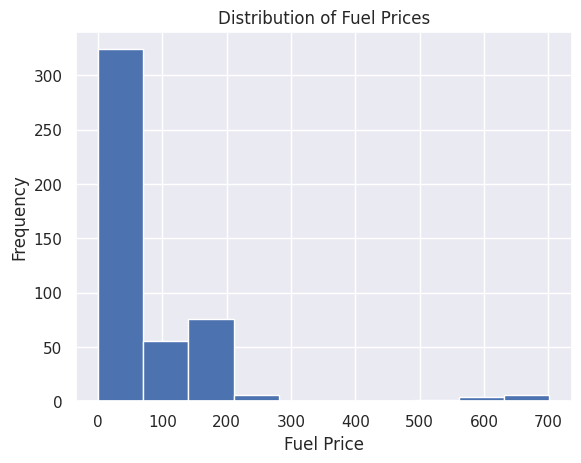

In [22]:
# distribution of fuel prices

import matplotlib.pyplot as plt

# Create a histogram of the fuel prices
plt.hist(df_fuel['Price in Naira Per Litre'])
plt.xlabel('Fuel Price')
plt.ylabel('Frequency')
plt.title('Distribution of Fuel Prices')
plt.show()


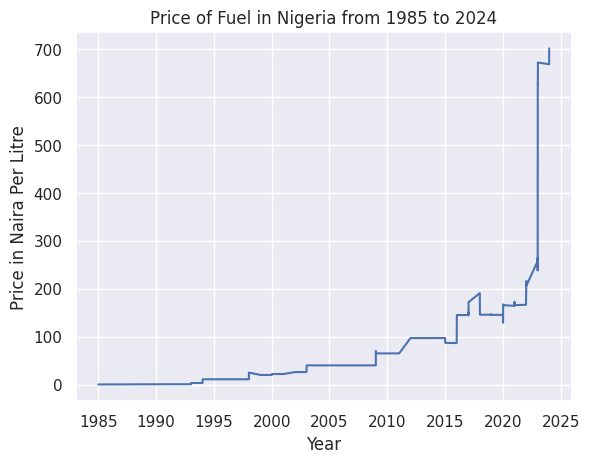

In [28]:
#  plot Price in Naira Per Litre agaist year

import matplotlib.pyplot as plt
plt.plot(df_fuel['Month_Year'], df_fuel['Price in Naira Per Litre'])
plt.xlabel('Year')
plt.ylabel('Price in Naira Per Litre')
plt.title('Price of Fuel in Nigeria from 1985 to 2024')
plt.show()


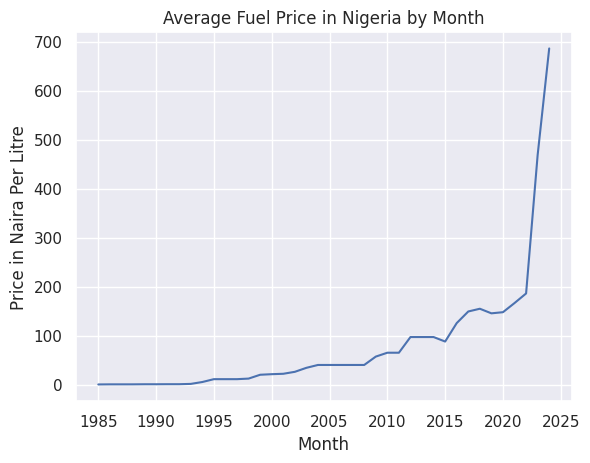

In [27]:
#  plot Price in Naira Per Litre by month

import matplotlib.pyplot as plt

# Assuming 'Month_Year' is your datetime column, convert it to datetime objects
df_fuel['Month_Year'] = pd.to_datetime(df_fuel['Month_Year'])

# Group the data by month and calculate the average price
df_fuel_by_month = df_fuel.groupby(df_fuel['Month_Year'].dt.to_period('M'))['Price in Naira Per Litre'].mean().reset_index()

# Convert Period objects back to datetime for plotting
df_fuel_by_month['Month_Year'] = df_fuel_by_month['Month_Year'].dt.to_timestamp()

# Create a line plot of the average price by month
plt.plot(df_fuel_by_month['Month_Year'], df_fuel_by_month['Price in Naira Per Litre'])
plt.xlabel('Month')
plt.ylabel('Price in Naira Per Litre')
plt.title('Average Fuel Price in Nigeria by Month')
plt.show()

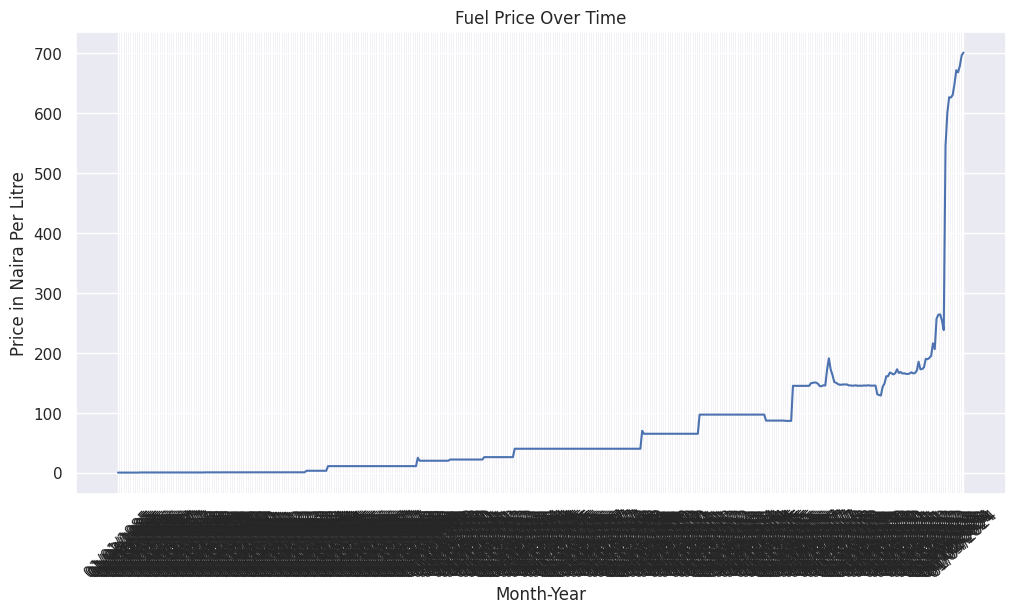

In [8]:
# Set Seaborn style
import seaborn as sns
import matplotlib.pyplot as plt


sns.set_theme(style="darkgrid")

# Plot fuel price over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month_Year', y='Price in Naira Per Litre', data=df_fuel)
plt.title('Fuel Price Over Time')
plt.xlabel('Month-Year')
plt.ylabel('Price in Naira Per Litre')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()


The line plot illustrates the fluctuation and increasing trend of fuel prices in Nigeria over time.

Increasing Trend: Fuel prices have generally increased over time, with a significant rise observed from 1985 to 2024. This indicates a long-term inflationary trend in fuel costs.

Volatility: There are periods of price stability interspersed with periods of sharp increases and some declines. This suggests that fuel prices are influenced by various factors, including global oil prices, government policies, and economic conditions.



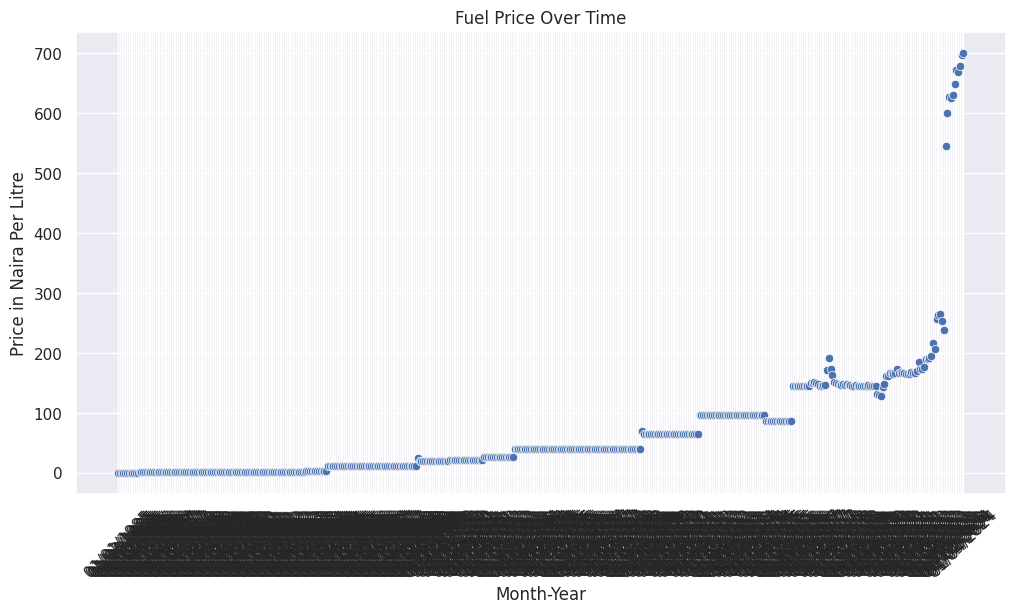

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import pearsonr

# Set Seaborn style
sns.set_theme(style="darkgrid")

# Plot fuel price over time
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Month_Year', y='Price in Naira Per Litre', data=df_fuel)
plt.title('Fuel Price Over Time')
plt.xlabel('Month-Year')
plt.ylabel('Price in Naira Per Litre')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()




In [11]:
import plotly.express as px
from scipy.stats import pearsonr
import pandas as pd

# Convert `Month_Year` to timestamps
df_fuel['Month_Year_Timestamp'] = pd.to_datetime(df_fuel['Month_Year']).map(pd.Timestamp.timestamp)

# Create line plot
fig = px.line(df_fuel, x='Month_Year', y='Price in Naira Per Litre', title='Fuel Price Over Time')

# Calculate correlation
correlation, _ = pearsonr(df_fuel['Month_Year_Timestamp'], df_fuel['Price in Naira Per Litre'])

# Add annotation to the plot
fig.add_annotation(
    x=0.5,  # Midpoint of the x-axis
    y=0.95,  # Near the top of the y-axis
    text=f"Correlation: {correlation:.3f}",
    showarrow=False,
    font=dict(size=14)
)

# Show the plot
fig.show()


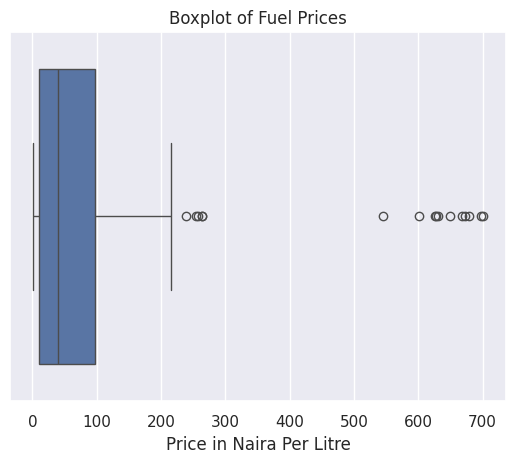

In [12]:
# creat boxplot

import matplotlib.pyplot as plt
# Create a boxplot of fuel prices
sns.boxplot(x=df_fuel['Price in Naira Per Litre'])
plt.title('Boxplot of Fuel Prices')
plt.xlabel('Price in Naira Per Litre')
plt.show()


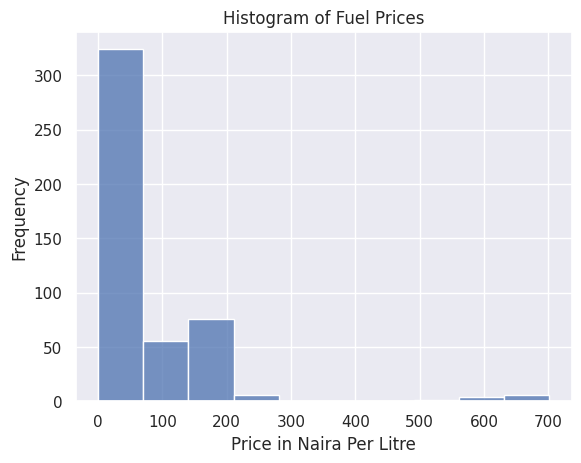

In [13]:
#  histogram

import matplotlib.pyplot as plt
# Create a histogram of fuel prices
sns.histplot(df_fuel['Price in Naira Per Litre'], bins=10)
plt.title('Histogram of Fuel Prices')
plt.xlabel('Price in Naira Per Litre')
plt.ylabel('Frequency')
plt.show()


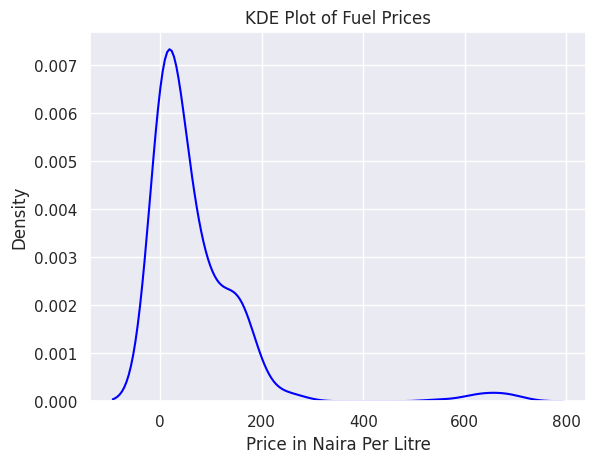

In [14]:
# prompt:
import matplotlib.pyplot as plt
# Create a KDE plot of fuel prices
sns.kdeplot(df_fuel['Price in Naira Per Litre'], color='blue')
plt.title('KDE Plot of Fuel Prices')
plt.xlabel('Price in Naira Per Litre')
plt.ylabel('Density')
plt.show()


In [15]:
#  lineplot using plotly

import pandas as pd
import plotly.express as px

# Convert 'Month_Year' to a datetime object
df_fuel['Month_Year'] = pd.to_datetime(df_fuel['Month_Year'])

# Create a line plot using Plotly Express
fig = px.line(df_fuel, x='Month_Year', y='Price in Naira Per Litre', title='Fuel Price Over Time')

# Show the plot
fig.show()


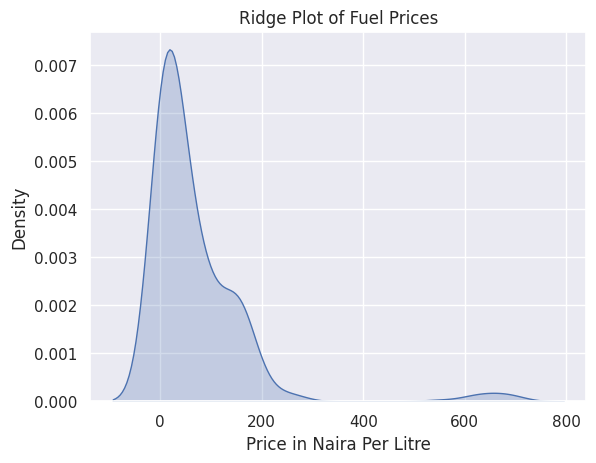

In [17]:
#  ridgeplot usig seaborn

import matplotlib.pyplot as plt
# Create a ridge plot using Seaborn
sns.set_theme(style="darkgrid")
sns.kdeplot(data=df_fuel, x="Price in Naira Per Litre", fill=True)
plt.title('Ridge Plot of Fuel Prices')
plt.xlabel('Price in Naira Per Litre')
plt.ylabel('Density')
plt.show()


Based on the visualizations, we can make the following observations about fuel prices in Nigeria:

Increasing Trend: Fuel prices have generally increased over time, with a significant rise observed from 1985 to 2023. This indicates a long-term inflationary trend in fuel costs.

Volatility: There are periods of price stability interspersed with periods of sharp increases and some declines. This suggests that fuel prices are influenced by various factors, including global oil prices, government policies, and economic conditions.

No Clear Seasonality: The boxplot by month does not reveal any consistent seasonal patterns in fuel prices. This suggests that fuel prices are not significantly affected by seasonal factors like weather or holidays.

Yearly Trends: The boxplot by year shows the increasing trend in fuel prices more clearly, with the median and range of prices generally rising over time.

Distribution: The histogram of fuel prices is right-skewed, indicating that most prices are concentrated at the lower end, with fewer instances of very high prices. This suggests that while fuel prices have generally increased, there have been periods of relatively stable or low prices.

Overall, the analysis reveals a dynamic fuel price landscape in Nigeria, characterized by a long-term increasing trend, price volatility, and the absence of clear seasonal patterns. The insights gained from this EDA can be valuable for policymakers, consumers, and businesses in understanding and anticipating fuel price trends in Nigeria.